In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import time
from copy import copy
from time import time
from tqdm.notebook import tqdm
from multiprocessing import Pool
from simulation import Simulation_Base
from mip_solver import MIP_solver

class Simulation_C(Simulation_Base):
    number = 2
    
    def __init__(self, silent=False):
        Simulation_Base.__init__(self, number=self.number, silent=silent)
        
    def compute_best_libs(self):
        self.mip = MIP_solver(self)
        self.ind_libs_best = np.array(self.mip.get_best_libs_unlimited_ships(np.arange(self.num_libs), self.num_days - 1))
        
    def compute_best_order_and_books(self):
        ind_libs_duration = (self.lib_num_books / self.lib_ships)[self.ind_libs_best]
        ind_libs_sorted = np.argsort(-ind_libs_duration)
        self.ind_libs_best = self.ind_libs_best[ind_libs_sorted]
        self.solution = [(lib, self.lib_books_lists[lib]) for lib in self.ind_libs_best]
        
    def run(self):
        t0 = time()
        self.compute_best_libs()
        t1 = time()
        print("computing best libs done: ", t1-t0)
        self.compute_best_order_and_books()
        t2 = time()
        print("computing best order and books done: ", t2-t1)
        
        
sim = Simulation_C()
sim.run()
print(sim.get_score())
# sim.write()

computing best libs done:  41.468568086624146
computing best order and books done:  0.0010099411010742188
5690888


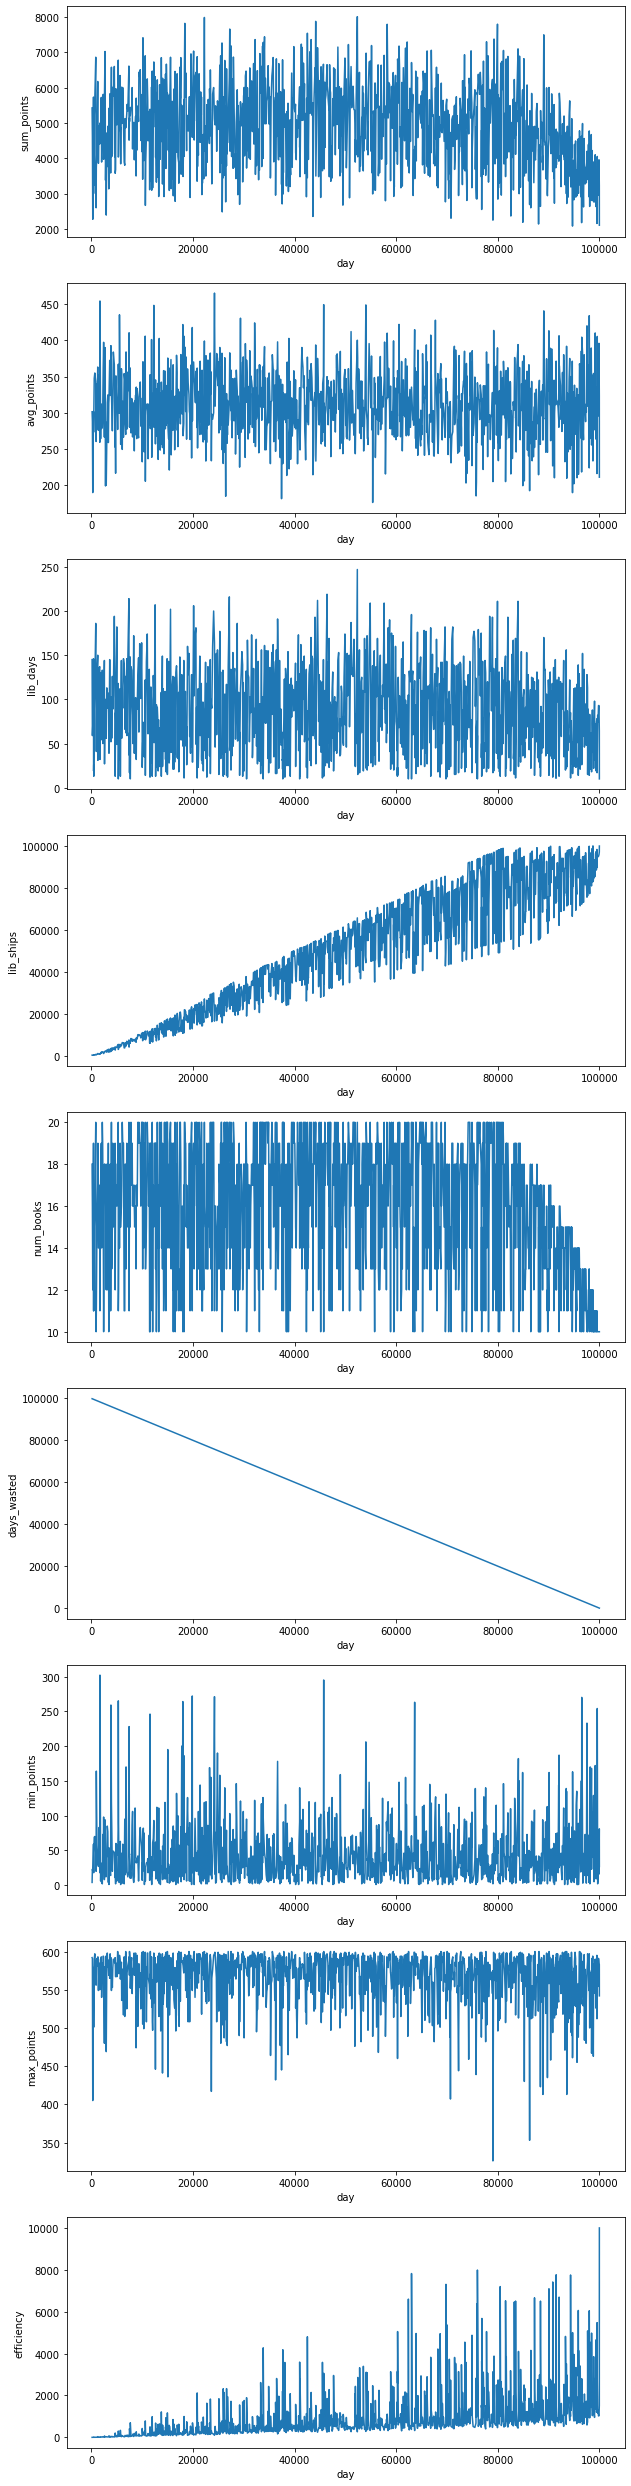

In [9]:
sim.plot_solution()